#**Redes Convolucionales MNIST**

In [ ]:
# Importar las librerias
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import ModelCheckpoint

In [ ]:
# Importar los datos del dataset
(X, y), (Xtest, ytest) = mnist.load_data()
print(f"Dimensiones de Xtrain: {X.shape}")
print(f"Dimensiones de Ytrain: {y.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dimensiones de Xtrain: (60000, 28, 28)
Dimensiones de Ytrain: (60000,)


In [ ]:
# Dividir el dataset en entrenamiento y validacion
Xtrain = X[0:50000, :, :]
ytrain = y[0:50000]
Xval = X[50000:, :, :]
yval = y[50000:]

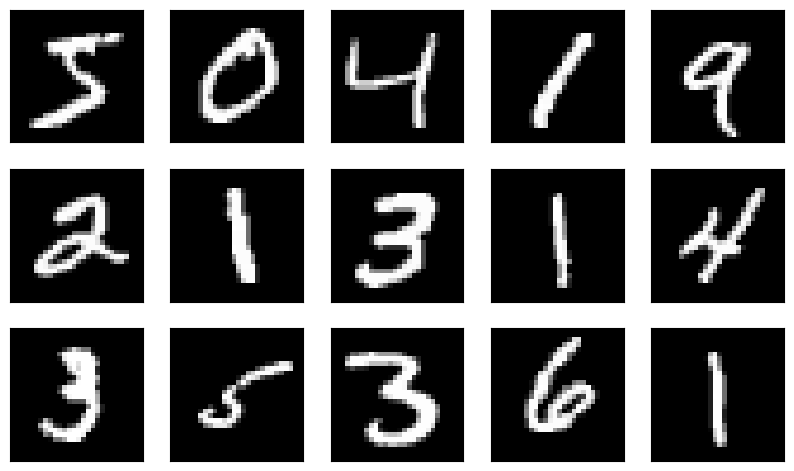

In [ ]:
# Ver algunas de las imagenes
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xtrain[i], cmap=plt.cm.gray)
plt.show()

In [ ]:
# Preprocesamiento de las imagenes
Xtrain = Xtrain.reshape(50000, 28, 28, 1).astype("float32")
Xval = Xval.reshape(10000, 28, 28, 1).astype("float32")
Xtest = Xtest.reshape(10000, 28, 28, 1).astype("float32")

Xtrain /= 255
Xval /= 255
Xtest /= 255

In [ ]:
# Codificacion One-hot encoding
Ytrain = to_categorical(ytrain, 10)
Yval = to_categorical(yval, 10)
Ytest = to_categorical(ytest, 10)
# Verificar las dimensiones
print("Dimensiones de Xtrain", Xtrain.shape, Xtrain.dtype)
print("Dimensiones de Xval", Xval.shape, Xval.dtype)
print("Dimensiones de Xtest", Xtest.shape, Xtest.dtype)

Dimensiones de Xtrain (50000, 28, 28, 1) float32
Dimensiones de Xval (10000, 28, 28, 1) float32
Dimensiones de Xtest (10000, 28, 28, 1) float32


In [ ]:
# Modelo LeNet-5
lenet = Sequential()
lenet.add(Conv2D(6, (5, 5), strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)))
lenet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

lenet.add(Conv2D(16, (5, 5), strides=(1, 1), padding='valid', activation='relu'))
lenet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

lenet.add(Flatten())
lenet.add(Dense(120, activation='relu'))
lenet.add(Dense(84, activation='relu'))
lenet.add(Dense(10, activation='softmax'))

lenet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilacion del modelo
adam = optimizers.Adam(learning_rate=0.001)
lenet.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

# Configuracion para guardar el mejor modelo
checkpointer = ModelCheckpoint(filepath="mnist_lenet5.keras", monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")

In [ ]:
# Entrenamiento del modelo
h = lenet.fit(Xtrain, Ytrain, batch_size=128, epochs=10, verbose=1, validation_data=(Xval, Yval), shuffle=True, callbacks=[checkpointer])

Epoch 1/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7565 - loss: 0.7811
Epoch 1: val_accuracy improved from -inf to 0.96950, saving model to mnist_lenet5.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.7572 - loss: 0.7790 - val_accuracy: 0.9695 - val_loss: 0.1108
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9670 - loss: 0.1087
Epoch 2: val_accuracy improved from 0.96950 to 0.97750, saving model to mnist_lenet5.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9670 - loss: 0.1087 - val_accuracy: 0.9775 - val_loss: 0.0761
Epoch 3/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9778 - loss: 0.0707
Epoch 3: val_accuracy did not improve from 0.97750
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 59ms/step - accuracy: 0.9778 - loss: 0.0707 - val_accuracy: 0.9744 - val_loss: 0.0864
Epoch 4/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9833 - loss: 0.0558
Epoch 4: val_accuracy improved from 0.97750 to 0.98400, saving mo

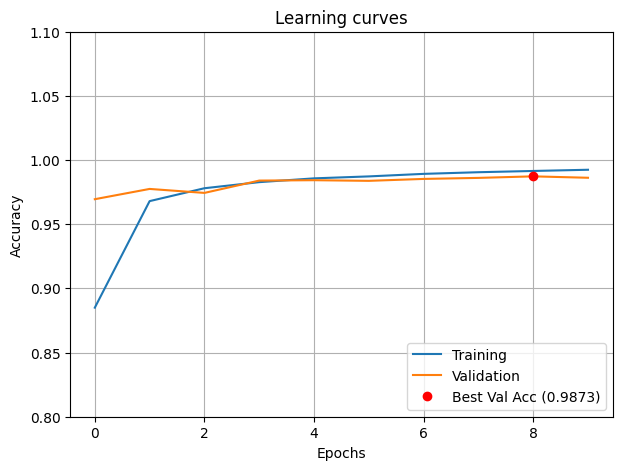

In [ ]:
# Mostrar la curva de aprendizaje del modelo
plt.figure(figsize=(7, 5))

epoch_max = np.argmax(h.history["val_accuracy"])

# Precision de entrenamiento y validacion
plt.plot(h.history["accuracy"], label="Training")
plt.plot(h.history["val_accuracy"], label="Validation")

# Mejor valor de precision de validacion
plt.plot(epoch_max, h.history["val_accuracy"][epoch_max], 'ro', label=f"Best Val Acc ({h.history['val_accuracy'][epoch_max]:.4f})")

plt.legend(loc="lower right")
plt.title("Learning curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.8, 1.1])
plt.grid(True)

plt.show()